In [9]:
import pandas as pd
tsa_melted_holiday_travel = pd.read_csv('data/holiday_travel.csv')
tsa_melted_holiday_travel.head()


,date,year,travelers,holiday
0,2019-01-01,2019,2126398.0,New Year's Day
1,2019-01-02,2019,2345103.0,New Year's Day
2,2019-01-03,2019,2202111.0,NaN
3,2019-01-04,2019,2150571.0,NaN
4,2019-01-05,2019,1975947.0,NaN


In [17]:
tsa_melted_holiday_travel.dtypes

date          object
year           int64
travelers    float64
holiday       object
dtype: object

In [12]:
def mpl_svg_config(hashsalt):
    """Help configure the SVG backend for Matplotlib and make it reproducible."""
    from matplotlib import rc
    rc('svg', hashsalt=hashsalt)

    return {
        'metadata': {
            'Date': f'(c) 2021-{dt.date.today().year} Stefanie Molin'
        }
    }

In [14]:
import matplotlib_inline
import datetime as dt



matplotlib_inline.backend_inline.set_matplotlib_formats(
    'svg', # output images using SVG format
    **mpl_svg_config('section-3') # optional: configure metadata
)

In [23]:
tsa_melted_holiday_travel['date'] = pd.to_datetime(tsa_melted_holiday_travel['date'])
tsa_melted_holiday_travel.set_index('date', inplace=True)

plot_data = tsa_melted_holiday_travel[tsa_melted_holiday_travel['year'] == 2020].drop(columns='year')

plot_data = plot_data.assign(
    **{
        '7D MA': lambda x: x.travelers.rolling(window=7).mean(),  # Use an integer window size
        'YTD mean': lambda x: x.travelers.expanding().mean()
    }
)

# Display the first few rows
print(plot_data.head())


            travelers         holiday  7D MA   YTD mean
date                                                   
2020-01-01  2311732.0  New Year's Day    NaN  2311732.0
2020-01-02  2178656.0  New Year's Day    NaN  2245194.0
2020-01-03  2422272.0             NaN    NaN  2304220.0
2020-01-04  2210542.0             NaN    NaN  2280800.5
2020-01-05  1806480.0             NaN    NaN  2185936.4


<Axes: title={'center': '2020 TSA Traveler Throughput'}, xlabel='date', ylabel='travelers'>

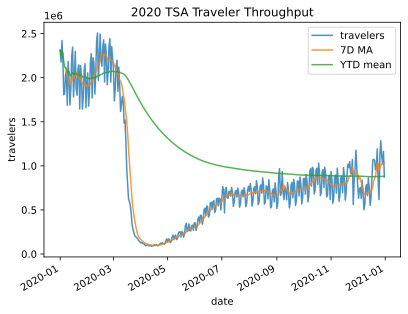

In [29]:
plot_data.plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)


In [30]:
#Bar plot
plot_data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')
plot_data.head()

year,2019,2020,2021
month,,,
1,59405722.0,61930286.0,23598230.0
2,57345684.0,60428859.0,24446345.0
3,72530252.0,32995003.0,38050060.0
4,70518994.0,3322548.0,41826159.0
5,74617773.0,7244733.0,NaN


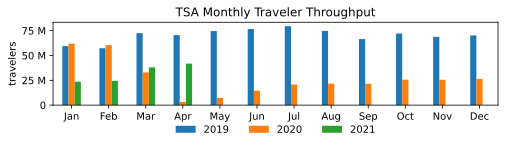

In [31]:
import calendar
from matplotlib import ticker

ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='travelers',
    figsize=(8, 1.5), title='TSA Monthly Traveler Throughput'
)

# use month abbreviations for the ticks on the x-axis
ax.set_xticklabels(calendar.month_abbr[1:])

# show y-axis labels in millions instead of scientific notation
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncols=3, frameon=False)

In [32]:
import matplotlib.pyplot as plt


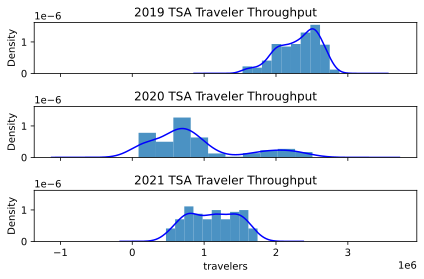

In [33]:
# define the subplot layout
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 4))

for year, ax in zip(tsa_melted_holiday_travel.year.unique(), axes):
    plot_data = tsa_melted_holiday_travel.loc[str(year)].travelers
    plot_data.plot(kind='hist', legend=False, density=True, alpha=0.8, ax=ax)
    plot_data.plot(kind='kde', legend=False, color='blue', ax=ax)
    ax.set(title=f'{year} TSA Traveler Throughput', xlabel='travelers')

fig.tight_layout() # handle overlaps

In [35]:
data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')

data

year,2019,2020,2021
month,,,
1,59405722.0,61930286.0,23598230.0
2,57345684.0,60428859.0,24446345.0
3,72530252.0,32995003.0,38050060.0
4,70518994.0,3322548.0,41826159.0
5,74617773.0,7244733.0,NaN
6,76619900.0,14481802.0,NaN
7,79511968.0,20740781.0,NaN
8,74776010.0,21708071.0,NaN
9,66531258.0,21488263.0,NaN
